<a href="https://colab.research.google.com/github/KrishnaPrabeeshk/Titanic-Survival-Project/blob/main/Titanic_Survival_Prediction_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description:This program will predict whether a passenger will survive on the Titanic or not

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load The Dataset
Titanic=sns.load_dataset('titanic')

#Printing the first 10 rows of the dataset
Titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#Counting the number of rows and columns in the data set.
Titanic.shape

(891, 15)

In [ ]:
#To get some statistics on the dataset
Titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Getting a count of number of survivors on the titanic
Titanic['survived'].value_counts() 

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


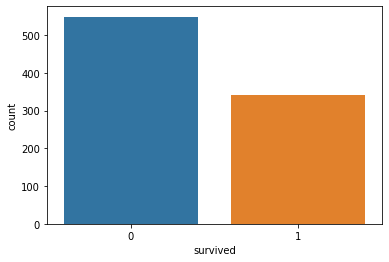

In [ ]:
#Graphical view of the survivors count
sns.countplot(Titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

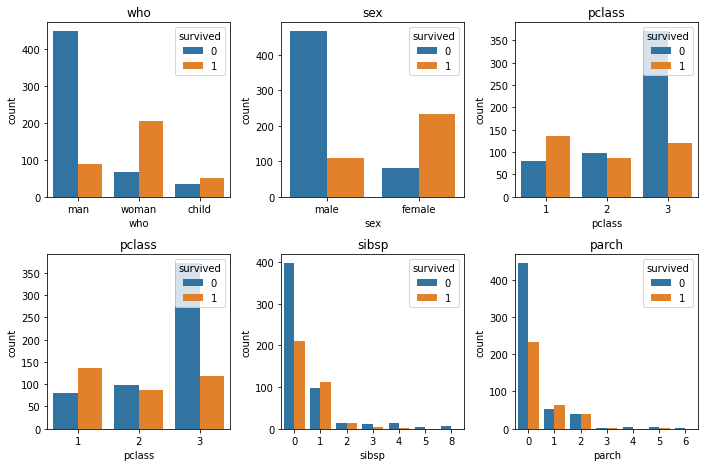

In [ ]:
#Visualize the count of survivors for columns like 'who', 'gender' , 'pclass' , 'sibsp' , 'parch' , 'embarked'
cols = ['who', 'sex' , 'pclass' , 'sibsp' , 'parch' , 'embarked']
n_rows=2
n_columns=3
#Giving dimensions and all for each plot
flg,axs = plt.subplots(n_rows , n_columns , figsize = (n_columns*3.3,n_rows*3.3))
for i in range(n_rows):
  for j in range(n_columns):
    k = i*n_rows + j #to go through every index .
    ax = axs[i][j] # to show where to place the graphs .
    sns.countplot(Titanic[cols[k]], hue= Titanic['survived'],ax=ax)
    ax.set_title(cols[k])
    ax.legend(title='survived',loc='upper right')
plt.tight_layout()

In [ ]:
#Looking at survival rate by gender
Titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#Looking at survival rate by gender and class
Titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


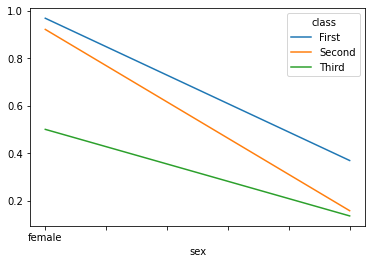

In [ ]:
#visualizing survival rate by gender and class
Titanic.pivot_table('survived',index='sex',columns='class').plot()

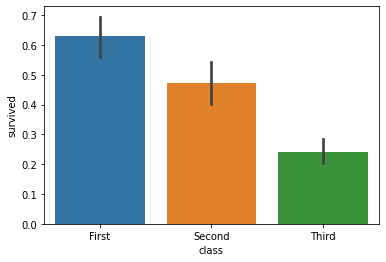

In [ ]:
#Plotting the survival rate of each class
sns.barplot(x='class',y='survived',data=Titanic)

In [ ]:
#looking at survival rate by gender , age , class
age = pd.cut(Titanic['age'], [0,18,80])
Titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

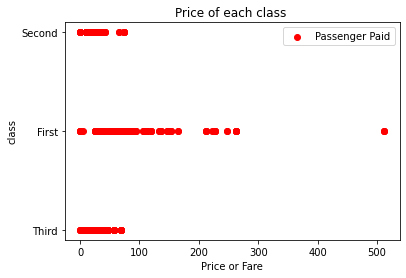

In [ ]:
#Plotting prices paid for each class
plt.scatter(Titanic['fare'], Titanic['class'] , color='red' , label='Passenger Paid')
plt.ylabel('class')
plt.xlabel('Price or Fare')
plt.title('Price of each class ')
plt.legend()
plt.show()

In [ ]:
Titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#looking at all the columns and getting a count
for val in Titanic:
  print(Titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
#Dropping some columns
Titanic = Titanic.drop(['deck' , 'embark_town' , 'alive' , 'class' , 'who' , 'alone' , 'adult_male'],axis=1)

#Removing rows with blank values
Titanic = Titanic.dropna(subset = ['embarked' , 'age'])

In [ ]:
#Count after deletion of some columns and blank rows
Titanic.shape

(712, 8)

In [ ]:
#Looking at the data types in the data set
Titanic.dtypes 

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
#Looking at unique values of gender and embarked columns
print(Titanic['sex'].unique())
print(Titanic['embarked'].unique())

[1 0]
['S' 'C' 'Q']


In [ ]:
#converting data types
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#encoding gender columns
Titanic.iloc[: , 2] = labelencoder.fit_transform(Titanic.iloc[: , 2].values)

Titanic.iloc[: , 7] = labelencoder.fit_transform(Titanic.iloc[: , 7].values)

In [ ]:
#Looking at unique values of gender and embarked columns
print(Titanic['sex'].unique())
print(Titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
#Splitting the data into independent variable 'X' and dependent variable 'Y'
X= Titanic.iloc[:,1:8].values
Y = Titanic.iloc[:,0].values

In [ ]:
#Splitting the data into 2 parts : traning set and test set 
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=0)

In [ ]:
#Feature scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Creating a function which returns prediction from several models

def models(X_train,Y_train):
  
  #Using Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train) 

  #Using KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
  knn.fit(X_train,Y_train)

  #Using SVC(linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear' , random_state=0)
  svc_lin.fit(X_train,Y_train)

  #Using SVC(RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf' , random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #Using GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,Y_train)

  #Using Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy' , random_state=0)
  tree.fit(X_train,Y_train)

  #Using RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , random_state=0)
  forest.fit(X_train,Y_train)

  #Checking the accuracy of each model
  print('[0] Logistic Regression Training Accuracy: ',log.score(X_train,Y_train))
  print('[1] K Neighbor Training Accuracy: ',knn.score(X_train,Y_train))
  print('[2] SVM with linear kernel Training Accuracy: ',svc_lin.score(X_train,Y_train))
  print('[3] SVM with RBF kernel Training Accuracy: ',svc_rbf.score(X_train,Y_train))
  print('[4] Gaussian NB Training Accuracy: ',gauss.score(X_train,Y_train))
  print('[5] Decision Tree Training Accuracy: ',tree.score(X_train,Y_train))
  print('[6] Random Forest Training Accuracy: ',forest.score(X_train,Y_train))

  return log,knn,svc_lin,svc_rbf,gauss,tree,forest


In [ ]:
#Caling the above function
model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy:  0.7978910369068541
[1] K Neighbor Training Accuracy:  0.8471001757469244
[2] SVM with linear kernel Training Accuracy:  0.7768014059753954
[3] SVM with RBF kernel Training Accuracy:  0.8506151142355008
[4] Gaussian NB Training Accuracy:  0.8031634446397188
[5] Decision Tree Training Accuracy:  0.9929701230228472
[6] Random Forest Training Accuracy:  0.9753954305799648


In [ ]:
#Showing the confusion matrix and accuracy of all the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  #Getting the values of  TN , FN ,TP , FP
  TN , FN ,TP , FP = confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
  test_score = (TP + TN)/(TP + TN + FP + FN)
  print(cm)
  print('Model[{}] Testing Accuracy="{}"'.format(i,test_score))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy="0.6573426573426573"

[[68 14]
 [17 44]]
Model[1] Testing Accuracy="0.5944055944055944"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy="0.6153846153846154"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy="0.6783216783216783"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy="0.6713286713286714"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy="0.46153846153846156"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy="0.6083916083916084"



In [ ]:
#Getting the importance of each column in our data set
forest = model[6]
importances = pd.DataFrame({'Feature' : Titanic.iloc[:,1:8].columns,'Importance':np.round(forest.feature_importances_,7)})
importances = importances.sort_values('Importance',ascending = False).set_index("Feature") 
importances

,Importance
Feature,
age,0.299737
fare,0.295566
sex,0.183027
pclass,0.097562
sibsp,0.050443
parch,0.043887
embarked,0.029777


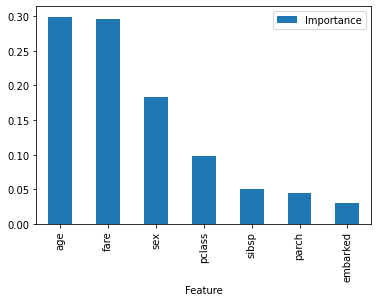

In [ ]:
#Visualizing the importances
importances.plot.bar()

In [ ]:
#Printing the prediction done by SVM_RBF
pred = model[3].predict(X_test)
print(pred)

print()

#Printing the actual results
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
#Giving my data
my_data = [[3,1,21,1,0,50,2]]

#Feature scaling my data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_data_scaled = sc.fit_transform(my_data)

#Printing the prediction using SVM_RBF
pred = model[3].predict(my_data_scaled)
if pred==0:
  print("Oh no!!! You did not Survive!!!")
else:
  print("yay!!!! You survived!!!!")

Oh no!!! You did not Survive!!!
